<a href="https://colab.research.google.com/github/Grecia329/EcuacionesDiferencialesParciales-/blob/main/Membrana_Vibratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuación de onda bidimensional en una membrana rectangular

Consideramos la ecuación de onda bidimensional:

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
$$

Con condiciones de frontera homogéneas:

$$
u(x, y, t) = 0 \quad \text{en los bordes del rectángulo} \quad (0 < x < a,\ 0 < y < b)
$$

Y condiciones iniciales:

$$
u(x, y, 0) = f(x, y), \quad \frac{\partial u}{\partial t}(x, y, 0) = 0
$$

Usamos separación de variables: $u(x,y,t) = X(x)Y(y)T(t)$

La solución general es:

$$
u(x, y, t) = \sum_{m=1}^{\infty} \sum_{n=1}^{\infty} A_{mn} \sin\left( \frac{m\pi x}{a} \right) \sin\left( \frac{n\pi y}{b} \right) \cos\left( c\pi \sqrt{\left(\frac{m}{a}\right)^2 + \left(\frac{n}{b}\right)^2} \cdot t \right)
$$

Donde:

$$
A_{mn} = \frac{4}{ab} \int_0^a \int_0^b f(x, y) \sin\left( \frac{m\pi x}{a} \right) \sin\left( \frac{n\pi y}{b} \right) dy\,dx
$$

Definamos la función inicial $f(x,y)$ :

In [1]:
import sympy as sp

In [3]:
# Definir variables simbólicas
x, y = sp.symbols('x y')
f = 0.1 * (4*x - x**2) * (2*y - y**2)


In [4]:
f

(-0.1*x**2 + 0.4*x)*(-y**2 + 2*y)

Calcular Aₘₙ para m=n=1

In [6]:
from sympy import sin, pi, integrate

a, b = 4, 2  # dimensiones de la membrana
m, n = 1, 1  # valores de m y n

# Definir el integrando
integrando = f * sin(m * pi * x / a) * sin(n * pi * y / b)

# Integrar en y y luego en x
A_mn = (4 / (a * b)) * integrate(integrate(integrando, (y, 0, b)), (x, 0, a))

In [7]:
A_mn.simplify()

409.6/pi**6

Escribir la solución particular con A₁₁:

In [9]:
t, c = sp.symbols('t c')
u = A_mn * sp.sin(m * pi * x / a) * sp.sin(n * pi * y / b) * sp.cos(
    c * pi * sp.sqrt((m / a)**2 + (n / b)**2) * t
)

In [10]:
u

409.6*sin(pi*x/4)*sin(pi*y/2)*cos(0.559016994374947*pi*c*t)/pi**6

Grafiquemos $f(x,y)$ :

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [12]:
# Parámetros
a, b = 4, 2

In [13]:
x_vals = np.linspace(0, a, 100)
y_vals = np.linspace(0, b, 100)
X, Y = np.meshgrid(x_vals, y_vals)

In [14]:
# Función f(x,y)
F = 0.1 * (4 * X - X**2) * (2 * Y - Y**2)

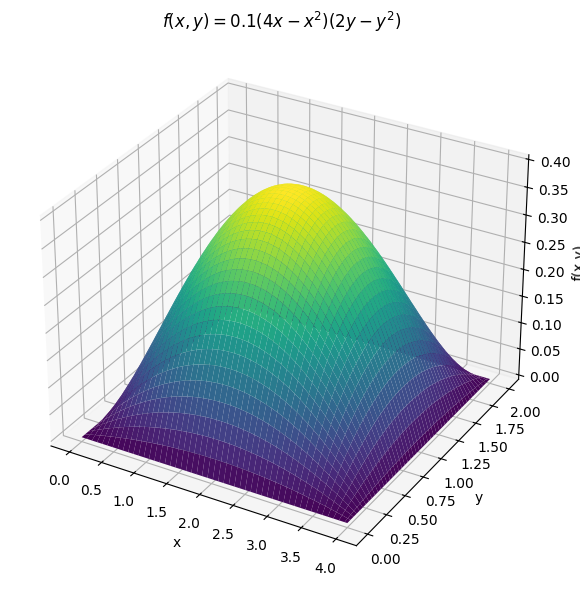

In [17]:
# Gráfica
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, F, cmap='viridis')
ax.set_title(r"$f(x, y) = 0.1(4x - x^2)(2y - y^2)$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
plt.tight_layout()
plt.show()

# Conclusión

Se resolvió la ecuación de onda en dos dimensiones usando separación de variables, aplicando condiciones iniciales y de frontera. Se obtuvo la solución general en forma de serie doble, y se calculó el primer término \( A_{11} \) para una condición inicial específica. También se graficó la función inicial para visualizar el estado de la membrana al inicio del tiempo.
